# NW Missouri State University 44608 Module 7 - Machine Learning

- Author: Aaron Gillespie
- Date: 2025-02-26
- Repo: [On GitHub](https://github.com/aarongilly/datafun-07-ml)
- Purpose:
Completing the 7th and final module of 44608, **Data Analytics Fundamentals**, with this introduction to machine learning with Python and Jupyter Notebooks (specifically *this notebook you're reading now*).

I'll be following along with sections 10.16 and 15.4 from [the textbook](https://www.pearson.com/en-us/subject-catalog/p/intro-to-python-for-computer-science-and-data-science-learning-to-program-with-ai-big-data-and-the-cloud/P200000003444/9780135404676).

In [151]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1 - Chart a Straight Line

Following along with section 10.16. We'll use a simple line chart to plot the conversion function between Fahrenheit and Celius using the formula:

```plaintext
c = 5 / 9 * (f - 32)
```

I'm modifying the parameters of the book's example code to start at Fahrenheit -50, rather than 0. This is because I wanted my chart to reflect the fact that **Fahrenheit and Celcius agree at -40 degrees**.

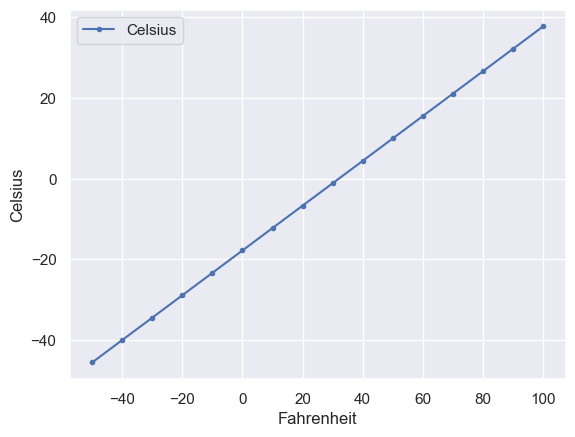

In [152]:
# Creating a lambda function mostly as a demo that lambda functions exist
c = lambda f: 5 / 9 * (f - 32)

# Fillling a list with tuples
temps = [(f, c(f)) for f in range( -50, 101, 10)]

# Creating a DataFrame from the list of tuples
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

Utilizing simple linear regressions. 

### Loading Data

In [153]:
# Load the dataset from file
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


### Data Inspection

Exploring the head & tail of the dataset to get a better feel for what's contained.

#### Head

In [154]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


#### Tail

In [155]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Cleaning Data

Cleanging the data to prep for Seaborn graphs, below.

In [156]:
# retitling 'value' column
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# converting date column to something more readable
nyc_df.Date = nyc_df.Date.floordiv(100)

# Observing the column name change
nyc_df.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


#### Descriptive Statistics

Using the awesome in-built function in Pandas.

In [157]:
# pd.set_option('display.precision', 2) # <- in the book, but didn't seem to have an effect in this case
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Forecasting Future January High Temperatures

Using SciPy & a basic linear regression.

In [158]:
linear_regression = stats.linregress(nyc_df.Date, nyc_df.Temperature)

#### Slope

In [159]:
linear_regression.slope

np.float64(0.014771361132966163)

In [160]:
#### Intercept

In [161]:
linear_regression.intercept

np.float64(8.694993233674289)

#### Applying the Regression to Forecast the average high Temp for January 2024

Based on data from 1899 to 2018...

In [162]:
forecast = linear_regression.slope * 2024 + linear_regression.intercept

pretty_number = '{:,.1f}'.format(forecast)
print('The forecasted average high temperature for NYC in January 2024 is', pretty_number)

The forecasted average high temperature for NYC in January 2024 is 38.6


### Visualizing the Linear Regression with Seaborn

(10.0, 70.0)

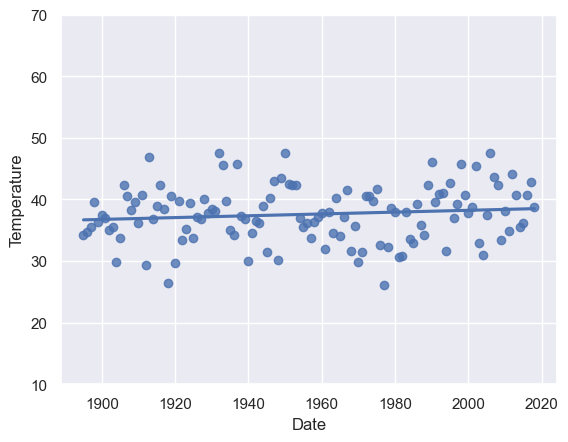

In [163]:
sns.set(style='darkgrid')
axes = sns.regplot(x='Date', y='Temperature', data=nyc_df, ci=None)
axes.set_ylim(10, 70)